In [1]:
import pandas as pd
import numpy as np
import json
import random

%matplotlib widget

from matplotlib import pyplot as plt

In [2]:
file_path = '../raw_data/SQuAD/train-v2.0.json'

In [3]:
ds = pd.read_json(file_path)
print(ds.head())

  version                                               data
0    v2.0  {'title': 'Beyoncé', 'paragraphs': [{'qas': [{...
1    v2.0  {'title': 'Frédéric_Chopin', 'paragraphs': [{'...
2    v2.0  {'title': 'Sino-Tibetan_relations_during_the_M...
3    v2.0  {'title': 'IPod', 'paragraphs': [{'qas': [{'qu...
4    v2.0  {'title': 'The_Legend_of_Zelda:_Twilight_Princ...


In [4]:
print(ds.columns)

Index(['version', 'data'], dtype='object')


In [5]:
print(ds.iloc[5].data.keys())

dict_keys(['title', 'paragraphs'])


In [6]:
print(ds.iloc[5].data['paragraphs'])

[{'qas': [{'question': 'Which company made Spectre?', 'id': '56cdaf0362d2951400fa6808', 'answers': [{'text': 'Eon Productions', 'answer_start': 64}], 'is_impossible': False}, {'question': 'Who is the star of Spectre?', 'id': '56cdaf0362d2951400fa6809', 'answers': [{'text': 'Daniel Craig', 'answer_start': 93}], 'is_impossible': False}, {'question': 'What role does Daniel Craig play in Spectre?', 'id': '56cdaf0362d2951400fa680a', 'answers': [{'text': 'James Bond', 'answer_start': 36}], 'is_impossible': False}, {'question': 'What 007 movie did Sam Mendes previously direct?', 'id': '56cdaf0362d2951400fa680b', 'answers': [{'text': 'Skyfall', 'answer_start': 333}], 'is_impossible': False}, {'question': 'How much money did it take to make Spectre?', 'id': '56cdaf0362d2951400fa680c', 'answers': [{'text': '$245', 'answer_start': 504}], 'is_impossible': False}, {'question': 'How many James Bond films has Eon Productions produced?', 'id': '56cf2e15aab44d1400b88dc9', 'answers': [{'text': 'twenty-f

In [7]:
for item in ds.iloc[5].data['paragraphs']:
    print(item['context'])
    print(item['qas'])

Spectre (2015) is the twenty-fourth James Bond film produced by Eon Productions. It features Daniel Craig in his fourth performance as James Bond, and Christoph Waltz as Ernst Stavro Blofeld, with the film marking the character's re-introduction into the series. It was directed by Sam Mendes as his second James Bond film following Skyfall, and was written by John Logan, Neal Purvis, Robert Wade and Jez Butterworth. It is distributed by Metro-Goldwyn-Mayer and Columbia Pictures. With a budget around $245 million, it is the most expensive Bond film and one of the most expensive films ever made.
[{'question': 'Which company made Spectre?', 'id': '56cdaf0362d2951400fa6808', 'answers': [{'text': 'Eon Productions', 'answer_start': 64}], 'is_impossible': False}, {'question': 'Who is the star of Spectre?', 'id': '56cdaf0362d2951400fa6809', 'answers': [{'text': 'Daniel Craig', 'answer_start': 93}], 'is_impossible': False}, {'question': 'What role does Daniel Craig play in Spectre?', 'id': '56cd

In [8]:

content = []
with open(file_path, "r", encoding="utf-8") as file:
    content = file.read()

parsed_json = json.loads(content)
print(len(parsed_json['data']))

442


Example format:

{"prompt":"Context:<for example order details in natural language>\n\n###\n\nUser: <message1>\nAgent:", "completion":" <response1>\n"}


{"prompt":"Context:<for example order details in natural language>\n\n###\n\nUser: <message1>\nAgent: <response1>\nUser: <message2>\nAgent:", "completion":" <response2>\n"}


{"prompt":"Context:<for example order details in natural language>\n\n###\n\nUser: <message1>\nAgent: <response1>\nUser: <message2>\nAgent: <response2>\nUser: <message3>\nAgent:", "completion":" <response3>\n"}

In [9]:
num_multiple_answers = 0
for item in parsed_json['data']:
    for data in item['paragraphs']:
        context = data['context']
        
        for qa in data['qas']:
            if len(qa['answers']) > 1:
                num_multiple_answers +=1

print(num_multiple_answers)

0


In [26]:
prompt_completion_pairs = []

for item in parsed_json['data']:
    for data in item['paragraphs']:
        context = data['context']

        prompt = ""
        for i, qa in enumerate(data['qas']):
            if prompt == "":
                prompt += f"User: {qa['question']}\nAgent:"
            else:
                prompt += f"\nUser: {qa['question']}\nAgent:"
            
            impossible = qa['is_impossible']
            completion = ""
            if impossible:
                completion = 'No Answer Present.'
            else:
                completion = qa['answers'][0]['text']

            completion = " " + completion
            
            prompt_completion_pairs.append((f"{context}\n\n###\n\n{prompt}", completion + " END"))

            if i % 8 == 0: # prevent prompt gets too long
                prompt = ""
            else:
                prompt += completion



In [29]:
random.shuffle(prompt_completion_pairs)

for pairs in prompt_completion_pairs[:10]:
    print('='*60 +'\n')
    print(f"{pairs[0]}{pairs[1]}")


At the turn of the 21st century, a post-punk revival developed in British and American alternative and indie rock, which soon started appearing in other countries, as well. The earliest sign of a revival was the emergence of various underground bands in the mid-'90s. However, the first commercially successful bands – the Strokes, Franz Ferdinand, Interpol, Neils Children and Editors – surfaced in the late 1990s to early 2000s, as did several dance-oriented bands such as the Rapture, Radio 4 and LCD Soundsystem. Additionally, some darker post-punk bands began to appear in the indie music scene in the 2010s, including Cold Cave, She Wants Revenge, Eagulls, the Soft Moon, She Past Away and Light Asylum, who were also affiliated with the darkwave revival, as well as A Place to Bury Strangers, who combined early post-punk and shoegaze. These bands tend to draw a fanbase who are a combination of the indie music subculture, older post-punk fans and the current goth subculture. In the 2010s, 

In [12]:
print(len(prompt_completion_pairs))

130319


In [13]:
import re

word_pattern = re.compile(r'\b\w+\b')


def count_words(raw_text) -> int:
    if raw_text is None or raw_text == '':
        return 0

    word_count = len(word_pattern.findall(raw_text))

    return word_count


In [21]:
text_length = []
for pair in prompt_completion_pairs:
    text_length.append(count_words(pair[0]+pair[1]))

print(f'mean: {np.mean(text_length)}, std: {np.std(text_length)}')
print(f'min: {np.min(text_length)}, max: {np.max(text_length)}')

mean: 175.25838135651748, std: 64.471623185969
min: 30, max: 807


Text(0.5, 1.0, 'Text Length Distribution')

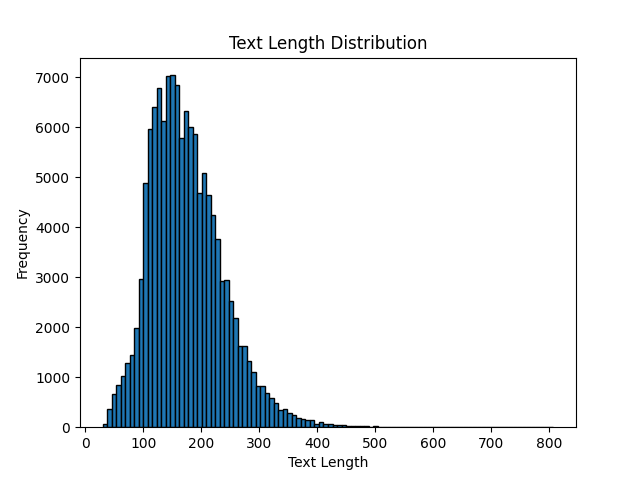

In [15]:
# Plotting the text length distribution
fit = plt.figure()
plt.hist(text_length, bins=100, edgecolor='black')  # Adjust the number of bins as per your preference
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')


In [22]:
import tiktoken

tokenizer = tiktoken.get_encoding('p50k_base')

token_length = []

for pair in prompt_completion_pairs:
    token_length.append(len(tokenizer.encode_ordinary(pair[0]+pair[1])))

print(f'mean: {np.mean(token_length)}, std: {np.std(token_length)}')
print(f'min: {np.min(token_length)}, max: {np.max(token_length)}')

mean: 236.43820931713717, std: 86.8328376727274
min: 46, max: 1795


Text(0.5, 1.0, 'Token Length Distribution')

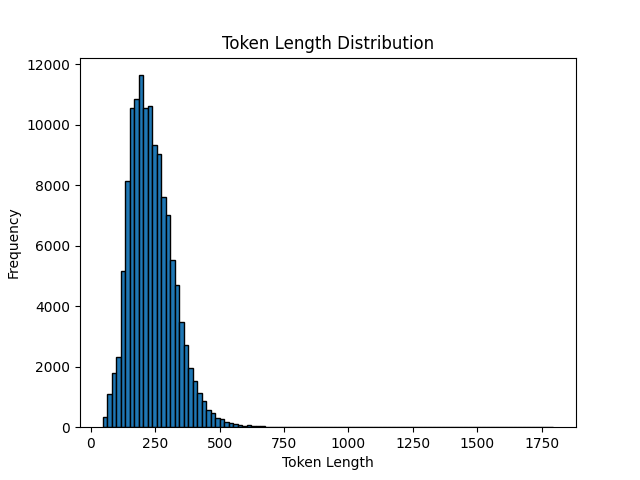

In [17]:
# Plotting the token length distribution
fit = plt.figure()
plt.hist(token_length, bins=100, edgecolor='black')  # Adjust the number of bins as per your preference
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
